In [1]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model, save_model, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D ,UpSampling2D, Flatten, Input
from tensorflow.keras.optimizers import Adam
# adam = adam_v2.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import cv2
from math import log10,sqrt
from PIL import Image
%matplotlib inline

In [54]:
CDAE = load_model('../weights/CDAE_model_1.h5')
encoder = load_model('../weights/encoder_model_1.h5')
classifier = load_model('../weights/Classifier_model_1.h5')

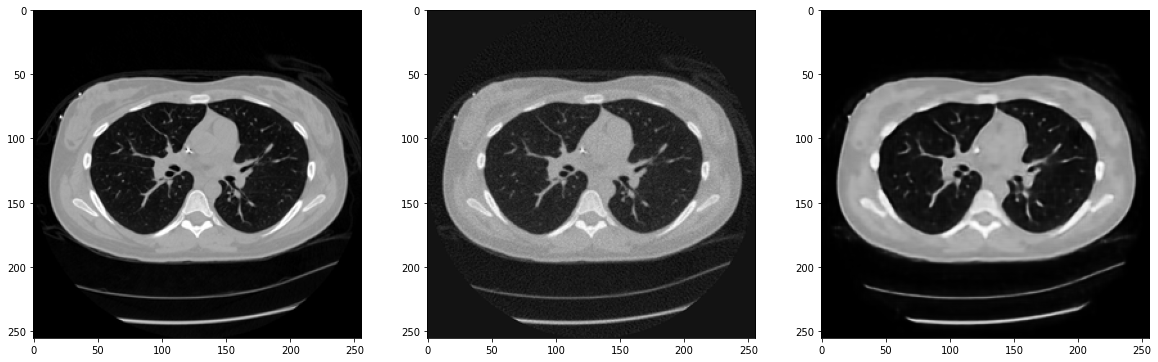

In [73]:
test_noisy_img_path = '/Users/kuzaowuwei/Documents/GitHub/CDAE-C/data/preprocess/3-noisy_bmp/1.3.6.1.4.1.14519.5.2.1.6279.6001.227962600322799211676960828223/135.bmp'
test_raw_img_path = '/Users/kuzaowuwei/Documents/GitHub/CDAE-C/data/preprocess/1-raw_bmp/1.3.6.1.4.1.14519.5.2.1.6279.6001.227962600322799211676960828223/135.bmp'

size = 256
test_noisy_img = np.array(Image.open(test_noisy_img_path).resize((size,size),Image.LANCZOS))/ 255
test_noisy_img = np.expand_dims(test_noisy_img,axis=0)
test_raw_img = np.array(Image.open(test_raw_img_path).resize((size,size),Image.LANCZOS))/ 255
test_raw_img = np.expand_dims(test_raw_img,axis=0)
pred_denoied_img = CDAE.predict(test_noisy_img)
f,ax=plt.subplots(1,3)
f.set_size_inches(20,10)
ax[0].imshow(np.squeeze(test_raw_img) , cmap='gray')
ax[1].imshow(np.squeeze(test_noisy_img) , cmap='gray')
ax[2].imshow(np.squeeze(pred_denoied_img) , cmap='gray')
# plt.axis('off')
plt.show()
plt.savefig('test.svg', bbox_inches='tight')

In [75]:
test_img_path = '/Users/kuzaowuwei/Documents/GitHub/CDAE-C/data/preprocess/5-ROI_classify/1/1/2.bmp'
size = 128
test_img = np.array(Image.open(test_img_path).resize((size,size),Image.LANCZOS))/ 255
test_img = np.expand_dims(test_img,axis=0)
pred_img = CDAE.predict(test_img)

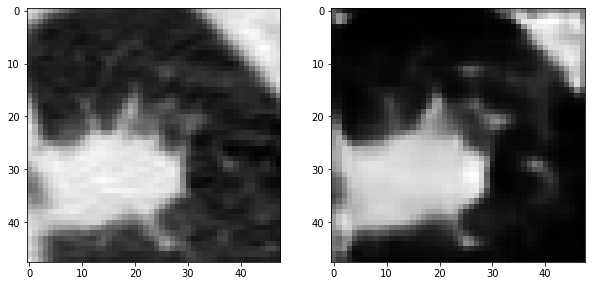

In [21]:
f,ax=plt.subplots(1,2)
f.set_size_inches(10,5)
ax[0].imshow(test_img[0] , cmap='gray')
ax[1].imshow(np.squeeze(pred_img[0]) , cmap='gray')
plt.show()

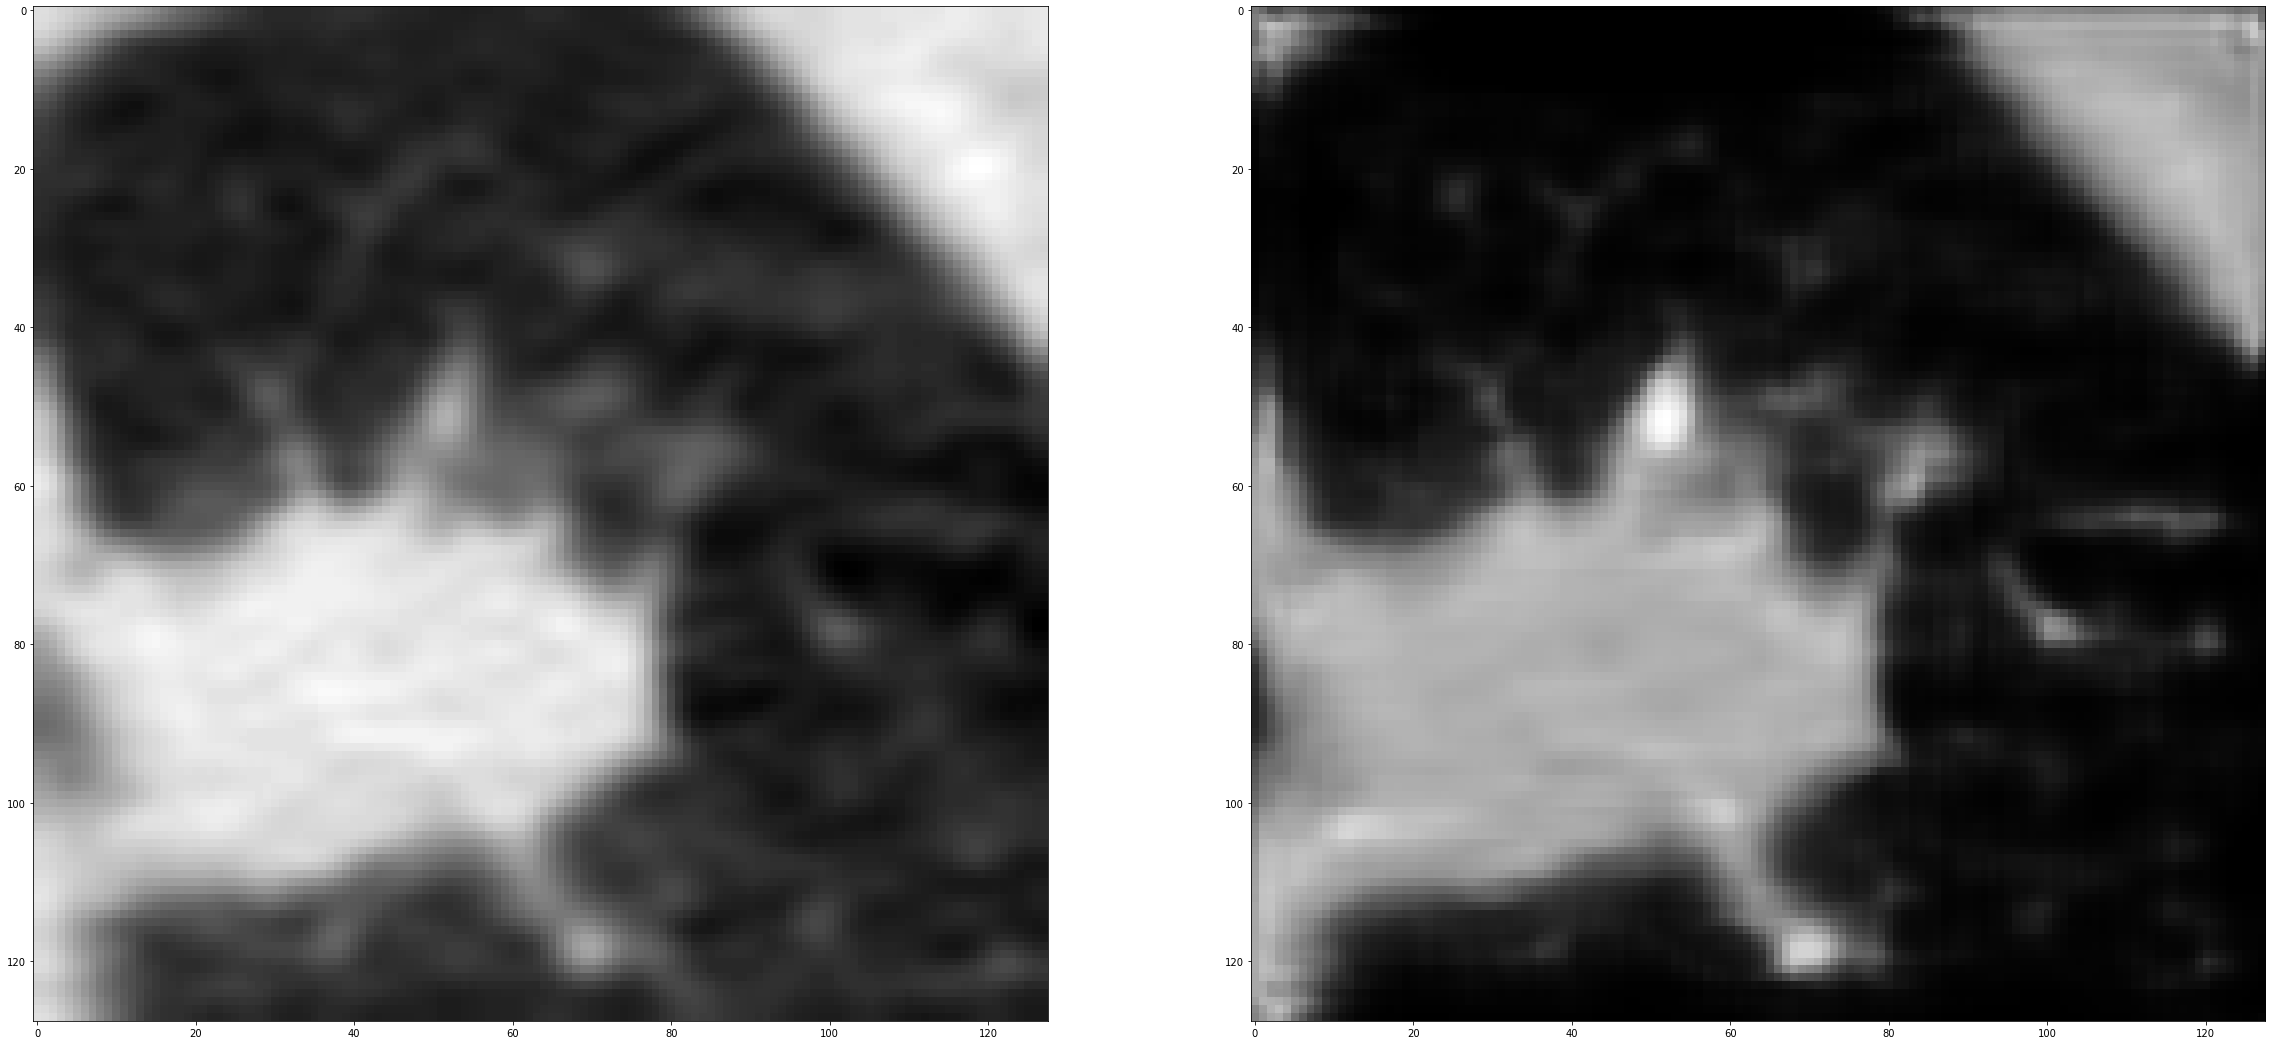

In [76]:
f,ax=plt.subplots(1,2)
f.set_size_inches(40,20)
ax[0].imshow(test_img[0] , cmap='gray')
ax[1].imshow(np.squeeze(pred_img[0]) , cmap='gray')
plt.show()

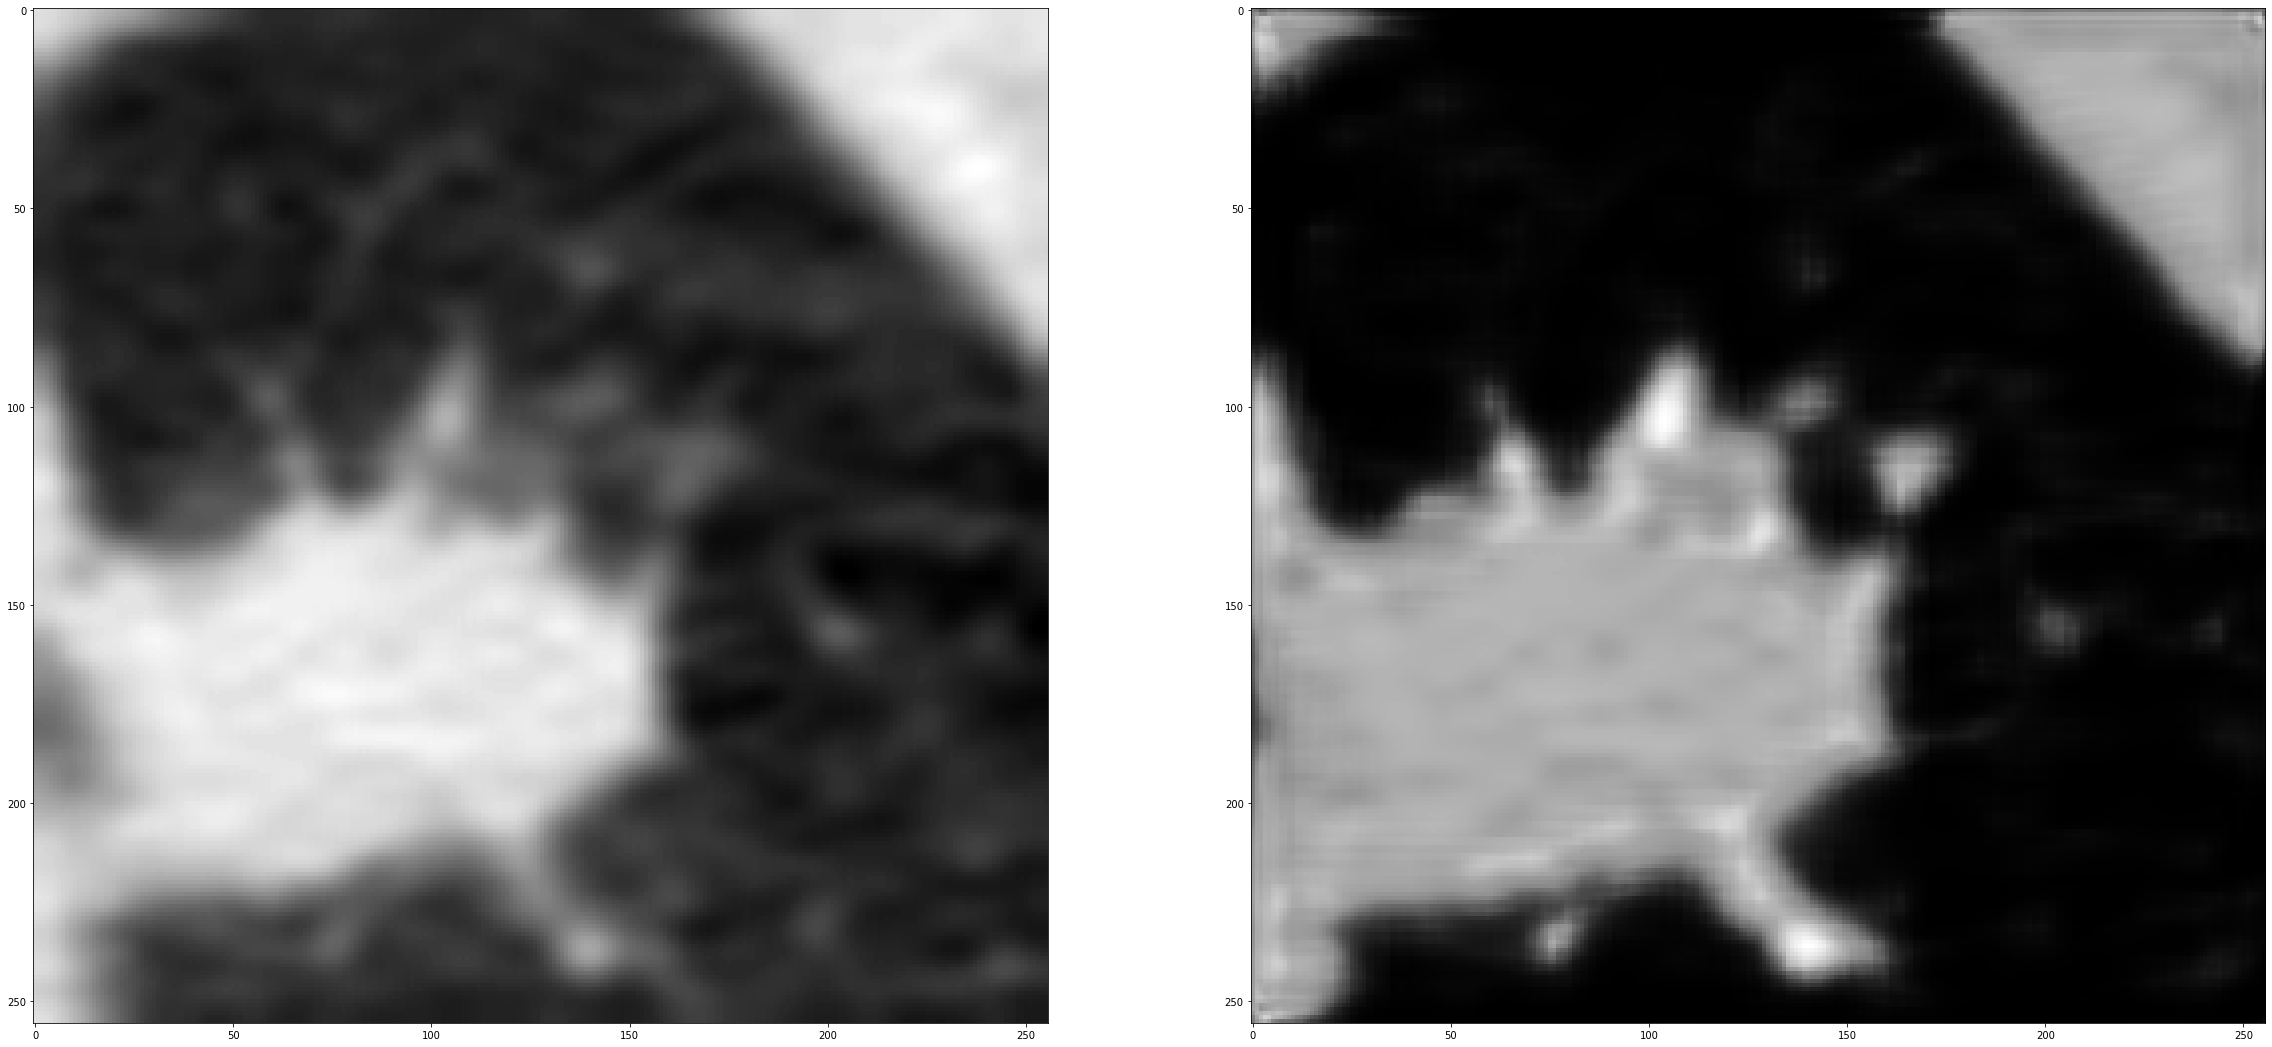

In [15]:
f,ax=plt.subplots(1,2)
f.set_size_inches(40,20)
ax[0].imshow(test_img[0] , cmap='gray')
ax[1].imshow(np.squeeze(pred_img[0]) , cmap='gray')
plt.show()

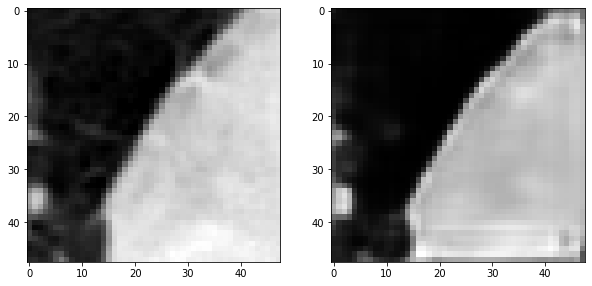

(5, 12, 12, 64)
prob:
Neg: 0.005231	Pos: 0.996701
label: 1


In [63]:
for id in range(20,21,1):
    '''
    read data
    '''
    test_imgs_path = '/Users/kuzaowuwei/Documents/GitHub/CDAE-C/data/preprocess/5-ROI_classify/0/'+str(id)+'/'
    # size = 48
    test_imgs = np.zeros((5,48,48,1))
    for i in range(5):
        test_imgs[i] = np.array(Image.open(test_imgs_path + str(i) + '.bmp')).reshape(48,48,1) / 255
    '''
    denoising
    '''
    pred_imgs = CDAE.predict(test_imgs)
    test_img = test_imgs[2]
    pred_img = pred_imgs[2]
    f,ax=plt.subplots(1,2)
    f.set_size_inches(10,5)
    ax[0].imshow(np.squeeze(test_img) , cmap='gray')
    ax[1].imshow(np.squeeze(pred_img) , cmap='gray')
    plt.show()
    '''
    classifying
    '''
    test_latent_code = encoder.predict(test_imgs)
    print(test_latent_code.shape)
    def concatenate_latent_code(latent_code, slice_num=5):
        temp = latent_code[0]
        for i in range(slice_num-1):
            temp = np.concatenate((temp, latent_code[i+1]),axis=2)
        return temp
    test_latent_code = np.expand_dims(concatenate_latent_code(test_latent_code),axis=0)
    pred_onehot = np.squeeze(classifier.predict(test_latent_code))
    # print(pred_onehot.shape)
    pred_label = 0
    if pred_onehot[1] > pred_onehot[0]:
        pred_label = 1
    print('prob:\nNeg: {:4f}\tPos: {:4f}'.format(pred_onehot[0],pred_onehot[1]))
    print('label:',pred_label)
    if pred_label==0:
        break